### Lab09
#### Pranisaa  Charnparttaravanit
#### st121720

In this lab, VAE was employed. We experimented it on three different datasets which are MNIST, AIT_ICT and Celeb. VAE for MNIST data set consists of fc layers. In contrastm AIT_ICT and celeb employ VAE that consist of 2d convolutional layers.

All three of them use Adam as optimizer.

However, the resulting images were still not very satisfying. 

One of the important tasks of this lab is to learn how to use Visdom. The following functions were implemented.

In [57]:
# class VisdomLinePlotter(object):
#     """Plots to Visdom"""
#     def __init__(self, env_name='main'):
#         self.viz = Visdom()
#         self.env = env_name
#         self.plots = {}
#     def plot(self, var_name, split_name, title_name, x, y):
#         if var_name not in self.plots:
#             self.plots[var_name] = self.viz.line(X=np.array([x,x]), Y=np.array([y,y]), env=self.env, opts=dict(
#                 legend=[split_name],
#                 title=title_name,
#                 xlabel='Epochs',
#                 ylabel=var_name
#             ))
#         else:
#             self.viz.line(X=np.array([x]), Y=np.array([y]), env=self.env, win=self.plots[var_name], name=split_name, update = 'append')
# class VisdomImage(object):
#     """Show images on Visdom"""
#     def __init__(self, env_name = 'main'):
#         self.viz = Visdom()
#         self.env = env_name  
#     def display_image(self,image, win, title_name):
#         #self.viz.images(image, env=self.env, win = self.win, opts = dict(caption = title_name, width = 256, height = 256))
#         self.viz.images(image, env=self.env, win = win, opts = dict(caption = title_name))

In [27]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from visdom import Visdom

In [28]:
from modules import VAE
from train_test import train
from train_test import test
import utils

#### Check availability of GPU

In [29]:
from chosen_gpu import get_freer_gpu
device = torch.device(get_freer_gpu())
print("Configured device: ", device)

Configured device:  cuda:1


## MNIST

#### 1. Load data

In [24]:
log_interval = 100
seed = 1

torch.manual_seed(seed)

In [30]:
out_dir = '../../../data/torch_data/VGAN/MNIST/dataset' #you can use old downloaded dataset, I use from VGAN
batch_size=128

train_loader = torch.utils.data.DataLoader(datasets.MNIST(root=out_dir, download=True, train=True, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root=out_dir, train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, num_workers=1, pin_memory=True)


#### 2. Set up model and optimizer

In [ ]:
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

#### 3. Download utils for Visdom setup

In [25]:
!wget https://raw.githubusercontent.com/noagarcia/visdom-tutorial/master/utils.py

--2021-03-20 01:49:23--  https://raw.githubusercontent.com/noagarcia/visdom-tutorial/master/utils.py
Connecting to 192.41.170.23:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 1129 (1.1K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   1.10K  --.-KB/s    in 0s      

2021-03-20 01:49:24 (26.5 MB/s) - ‘utils.py’ saved [1129/1129]



In [ ]:
# from visdom import Visdom

# import numpy as np

# class AverageMeter(object):
#     """Computes and stores the average and current value"""
#     def __init__(self):
#         self.reset()

#     def reset(self):
#         self.val = 0
#         self.avg = 0
#         self.sum = 0
#         self.count = 0

#     def update(self, val, n=1):
#         self.val = val
#         self.sum += val * n
#         self.count += n
#         self.avg = self.sum / self.count

# class VisdomLinePlotter(object):
#     """Plots to Visdom"""
#     def __init__(self, env_name='main'):
#         self.viz = Visdom()
#         self.env = env_name
#         self.plots = {}
#     def plot(self, var_name, split_name, title_name, x, y):
#         if var_name not in self.plots:
#             self.plots[var_name] = self.viz.line(X=np.array([x,x]), Y=np.array([y,y]), env=self.env, opts=dict(
#                 legend=[split_name],
#                 title=title_name,
#                 xlabel='Epochs',
#                 ylabel=var_name
#             ))
#         else:
#             self.viz.line(X=np.array([x]), Y=np.array([y]), env=self.env, win=self.plots[var_name], name=split_name, update = 'append')

##### 3.1 Modification of utils to display images

In [32]:
# class VisdomImage(object):
#     """Show images on Visdom"""
#     def __init__(self, env_name = 'main'):
#         self.viz = Visdom()
#         self.env = env_name  
#     def display_image(self,image, win, title_name):
#         #self.viz.images(image, env=self.env, win = self.win, opts = dict(caption = title_name, width = 256, height = 256))
#         self.viz.images(image, env=self.env, win = win, opts = dict(caption = title_name))

##### 3.2 modify train and test functions

By adding the following line to the train function <br>
&emsp;&emsp;&emsp;&emsp;plotter.plot('loss', 'train', 'TRAIN and TEST Loss', epoch, avg_train_loss )<br>
By adding the following lines to the test function<br>
&emsp;&emsp;&emsp;&emsp;plotter.plot('loss', 'test', 'Test Loss', epoch, test_loss)<br>
&emsp;&emsp;&emsp;&emsp;econ.display_image(comparison,1, 'TEST RECONSTRUCTION')


In [ ]:
# def train(batch_size, epoch, model, train_loader, device, optimizer, plotter):
#     model.train()
#     train_loss = 0
#     for batch_idx, (data, _) in enumerate(train_loader):
#         data = data.to(device)
#         optimizer.zero_grad()
#         recon_batch, mu, logvar = model(data)
#         loss = loss_function(recon_batch, data, mu, logvar)
#         loss.backward()
#         train_loss += loss.item()
#         optimizer.step()
#         if batch_idx % log_interval == 0:
#             print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#                 epoch, batch_idx * len(data), len(train_loader.dataset),
#                 100. * batch_idx / len(train_loader),
#                 loss.item() / len(data)))

#     avg_train_loss = train_loss / len(train_loader.dataset)
#     print('====> Epoch: {} Average loss: {:.4f}'.format(
#           epoch, avg_train_loss))
#     plotter.plot('loss', 'train', 'TRAIN and TEST Loss', epoch, avg_train_loss )
    

# def test(batch_size, epoch, model, test_loader, device, optimizer, plotter, recon):
#     viz = Visdom()
#     model.eval()
#     test_loss = 0
#     with torch.no_grad():
#         for i, (data, _) in enumerate(test_loader):
#             data = data.to(device)
#             recon_batch, mu, logvar = model(data)
#             test_loss += loss_function(recon_batch, data, mu, logvar).item()

#             # TEST RECONSTRUCTION
#             if i == 0:
#                 n = min(data.size(0), 8)
#                 comparison = torch.cat([data[:n],
#                                       recon_batch.view(batch_size, 1, 28, 28)[:n]])
#                 save_image(comparison.cpu(),
#                          'results/reconstruction_' + str(epoch) + '.png', nrow=n)
#     test_loss /= len(test_loader.dataset)
#     print('====> Test set loss: {:.4f}'.format(test_loss))

#     plotter.plot('loss', 'test', 'Test Loss', epoch, test_loss)
#     recon.display_image(comparison,1, 'TEST RECONSTRUCTION')

#### 4. Set up Visdom

In [ ]:
# Set up my visdom
# On one terminal run:
#      python3 -m visdom.server
# On another terminal run:
#      unset http_proxy 
#      unset https_proxy

#### 5. Train and test

In [ ]:
# On terminal run:
#      python3 main.py

In [ ]:
# epochs = 50
# viz = Visdom() 
# global plotter, recon
# plotter = utils.VisdomLinePlotter(env_name='main')
# sample_image = utils.VisdomImage(env_name='main')
# recon = utils.VisdomImage(env_name='main')

# for epoch in range(1, epochs + 1):
#     with torch.no_grad():
#         sample = torch.randn(64, 20).to(device)
#         sample = model.decode(sample).cpu()
#         print("save image: " + 'results/sample_' + str(epoch) + '.png')
#         save_image(sample.view(64, 1, 28, 28), 'results/sample_' + str(epoch) + '.png')
#         sample_image.display_image(sample.view(64, 1, 28, 28), 0, 'SAMPLE RECON')
#     train(batch_size, epoch, model, train_loader, device, optimizer, plotter)
#     test(batch_size, epoch, model, test_loader, device, optimizer, plotter, recon)

#### 6. Results

In [34]:
results = open("MNIST/output.txt", "r") 
print(results.read())

Configured device:  cuda:1
save image: results/sample_1.png
Train Epoch: 1 [0/60000 (0%)]	Loss: 550.320801
Train Epoch: 1 [12800/60000 (21%)]	Loss: 185.691071
Train Epoch: 1 [25600/60000 (43%)]	Loss: 155.525177
Train Epoch: 1 [38400/60000 (64%)]	Loss: 144.416336
Train Epoch: 1 [51200/60000 (85%)]	Loss: 136.900375
====> Epoch: 1 Average loss: 166.1227
====> Test set loss: 128.2925
save image: results/sample_2.png
Train Epoch: 2 [0/60000 (0%)]	Loss: 128.094650
Train Epoch: 2 [12800/60000 (21%)]	Loss: 129.330612
Train Epoch: 2 [25600/60000 (43%)]	Loss: 119.565887
Train Epoch: 2 [38400/60000 (64%)]	Loss: 119.851913
Train Epoch: 2 [51200/60000 (85%)]	Loss: 121.024185
====> Epoch: 2 Average loss: 121.7240
====> Test set loss: 115.7797
save image: results/sample_3.png
Train Epoch: 3 [0/60000 (0%)]	Loss: 117.591469
Train Epoch: 3 [12800/60000 (21%)]	Loss: 115.420944
Train Epoch: 3 [25600/60000 (43%)]	Loss: 112.725365
Train Epoch: 3 [38400/60000 (64%)]	Loss: 114.040131
Train Epoch: 3 [51200/600

Populating the interactive namespace from numpy and matplotlib


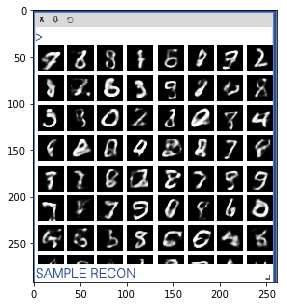

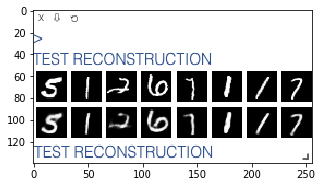

In [38]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('MNIST/img_report/Sample.png')
plt.figure(figsize = (10,5))
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('MNIST/img_report/Test_recon.png')
plt.figure(figsize = (5,5))
imgplot = plt.imshow(img)
plt.show()

#### 7. Train and Test Losses

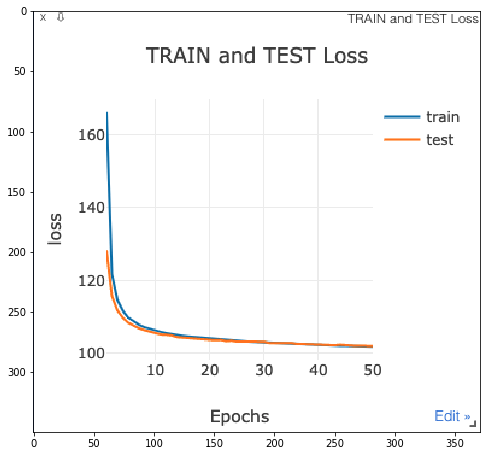

In [41]:
img = mpimg.imread('MNIST/img_report/Train_Test_Losses.png')
plt.figure(figsize = (8,8))
imgplot = plt.imshow(img)
plt.show()

## AIT

#### 1. Load data

In [ ]:
# compose = transforms.Compose(
#     [
#         transforms.Resize((64,64)),
#         transforms.ToTensor(),
#     ])

# ds = torchvision.datasets.ImageFolder(root='dataset/', transform=compose)

# ratio = [int(len(ds)*0.7), len(ds) - int(len(ds)*0.7)]

# train_dataset, test_dataset = torch.utils.data.random_split(ds, ratio)

# batch_size=4

# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
#                                                shuffle=True, num_workers=1, pin_memory=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
#                                              shuffle=False,num_workers=1, pin_memory=True)
# print('train_loader', len(train_loader))
# print('test_loader', len(test_loader))


#### 2. Set up model and optimizer

In [33]:
# model = VAE().to(device)
# optimizer = optim.Adam(model.parameters(), lr=1e-3, betas = (0.5,0.999), weight_decay = 0.0005)ฟ

#### 3. Modules

In [ ]:
# from torch import nn
# import torch
# from torch.nn import functional as F

# class Flatten(nn.Module):
#     def forward(self, input):
#         return input.view(input.size(0), -1)

# class UnFlatten(nn.Module):
#     def forward(self, input, size=1024):
#         return input.view(input.size(0), size, 1, 1)

# class VAE(nn.Module):
#     def __init__(self, image_channels=3, h_dim=1024, z_dim=32):
#         super(VAE, self).__init__()
        
#         self.image_channels = image_channels
#         self.h_dim = h_dim
#         self.z_dim = z_dim
        
#         # for encoder
#         self.encoder = nn.Sequential(
#             nn.Conv2d(self.image_channels, 32, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(64, 128, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(128, 256, kernel_size=4, stride=2),
#             nn.ReLU(),
#             Flatten()
#         )
        
#         self.fc1 = nn.Linear(self.h_dim, self.z_dim)
#         self.fc2 = nn.Linear(self.h_dim, self.z_dim)
#         self.fc3 = nn.Linear(self.z_dim, self.h_dim)
        
#         # for decoder
#         self.decoder = nn.Sequential(
#             UnFlatten(),
#             nn.ConvTranspose2d(self.h_dim, 128, kernel_size=5, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 32, kernel_size=6, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, self.image_channels, kernel_size=6, stride=2),
#             nn.Sigmoid(),
#         )

#     def encode(self, x):
#         h1 = self.encoder(x)
#         mu = self.fc1(h1)
#         logvar = self.fc2(h1)
#         return mu, logvar

#     def reparameterize(self, mu, logvar):
#         # 0.5 for square root (variance to standard deviation)
#         std = torch.exp(0.5*logvar)
#         eps = torch.randn_like(std)
#         z = mu + eps*std
#         return z

#     def decode(self, z):
#         z = self.fc3(z)
#         z = self.decoder(z)
#         return z

#     def forward(self, x):
#         mu, logvar = self.encode(x)
#         z = self.reparameterize(mu, logvar)
#         z = self.decode(z)
#         return z, mu, logvar

#### 4. Train and test

In [ ]:
# epochs = 100
# viz = Visdom() 
# global plotter, recon
# plotter = utils.VisdomLinePlotter(env_name='main')
# sample_image = utils.VisdomImage(env_name='main')
# recon = utils.VisdomImage(env_name='main')

# for epoch in range(1, epochs + 1):
#     with torch.no_grad():
#         sample = torch.randn(32,32).to(device)
#         sample = model.decode(sample).cpu()
#         print("save image: " + 'results/sample_' + str(epoch) + '.png')
#         save_image(sample, 'results/sample_' + str(epoch) + '.png')
#         sample_image.display_image(sample, 0, 'SAMPLE RECON')
#     train(batch_size, epoch, model, train_loader, device, optimizer, plotter)
#     test(batch_size, epoch, model, test_loader, device, optimizer, plotter, recon)

#### 5. Results

Populating the interactive namespace from numpy and matplotlib


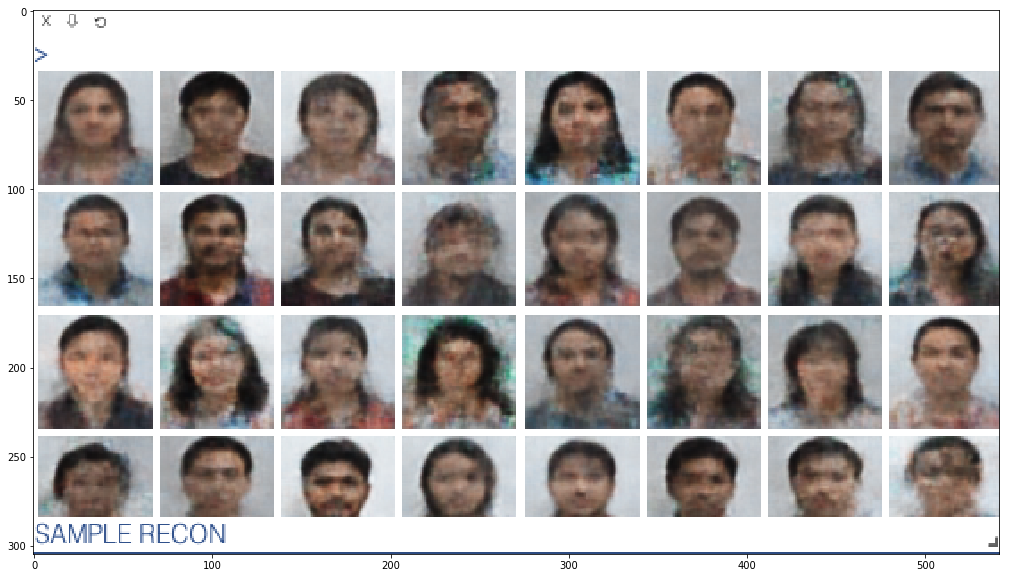

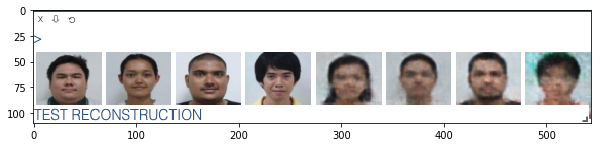

In [47]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('AIT_ICT/img_report/Sample.png')
plt.figure(figsize = (20,10))
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('AIT_ICT/img_report/Test_recon.png')
plt.figure(figsize = (10,5))
imgplot = plt.imshow(img)
plt.show()

In [48]:
results = open("AIT_ICT/output_report.txt", "r") 
print(results.read())

Train Epoch: 91 [0/221 (0%)]	Loss: 6205.482910
====> Epoch: 91 Average loss: 6190.6515
====> Test set loss: 6711.1120
save image: results/sample_92.png
Train Epoch: 92 [0/221 (0%)]	Loss: 5998.393066
====> Epoch: 92 Average loss: 6190.5994
====> Test set loss: 6727.1737
save image: results/sample_93.png
Train Epoch: 93 [0/221 (0%)]	Loss: 6088.486816
====> Epoch: 93 Average loss: 6182.4051
====> Test set loss: 6729.0874
save image: results/sample_94.png
Train Epoch: 94 [0/221 (0%)]	Loss: 6587.723633
====> Epoch: 94 Average loss: 6181.1824
====> Test set loss: 6726.4434
save image: results/sample_95.png
Train Epoch: 95 [0/221 (0%)]	Loss: 6506.093262
====> Epoch: 95 Average loss: 6185.2647
====> Test set loss: 6702.2802
save image: results/sample_96.png
Train Epoch: 96 [0/221 (0%)]	Loss: 6237.918945
====> Epoch: 96 Average loss: 6190.3502
====> Test set loss: 6706.8292
save image: results/sample_97.png
Train Epoch: 97 [0/221 (0%)]	Loss: 6313.203613
====> Epoch: 97 Average loss: 6189.4363
=

#### 6. Train and Test Losses

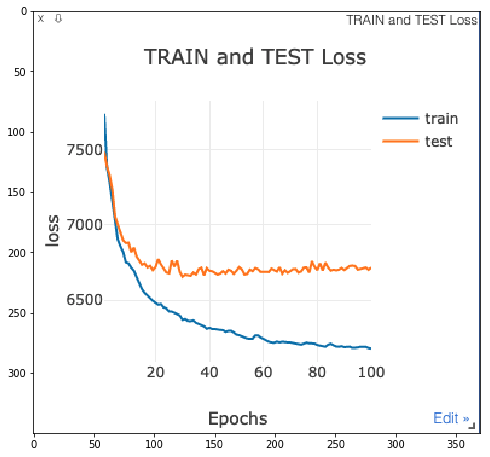

In [44]:
img = mpimg.imread('AIT_ICT/img_report/Train_Test_Losses.png')
plt.figure(figsize = (8,8))
imgplot = plt.imshow(img)
plt.show()

## CelebA

#### 1. Load data

In [54]:
# compose = transforms.Compose(
#     [
#         transforms.Resize((64,64)),
#         transforms.ToTensor(),
#         #transforms.Normalize((.5, .5, .5), (.5, .5, .5))
#     ])

# ds = torchvision.datasets.ImageFolder(root='dataset/', transform=compose)

# ratio = [int(len(ds)*0.98), len(ds) - int(len(ds)*0.98)]

# train_dataset, test_dataset = torch.utils.data.random_split(ds, ratio)

# batch_size=4

# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
#                                                shuffle=True, num_workers=1, pin_memory=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
#                                              shuffle=False,num_workers=1, pin_memory=True)

#### 2. Set up model and optimizer

In [ ]:
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, betas = (0.5,0.999), weight_decay = 0.0005)

#### 3. Modules

In [55]:
# from torch import nn
# import torch
# from torch.nn import functional as F

# class Flatten(nn.Module):
#     def forward(self, input):
#         return input.view(input.size(0), -1)

# class UnFlatten(nn.Module):
#     def forward(self, input, size=1024):
#         return input.view(input.size(0), size, 1, 1)

# class VAE(nn.Module):
#     def __init__(self, image_channels=3, h_dim=1024, z_dim=32):
#         super(VAE, self).__init__()
        
#         self.image_channels = image_channels
#         self.h_dim = h_dim
#         self.z_dim = z_dim
        
#         # for encoder
#         self.encoder = nn.Sequential(
#             nn.Conv2d(self.image_channels, 32, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(64, 128, kernel_size=4, stride=2),
#             nn.ReLU(),
#             nn.Conv2d(128, 256, kernel_size=4, stride=2),
#             nn.ReLU(),
#             Flatten()
#         )
        
#         self.fc1 = nn.Linear(self.h_dim, self.z_dim)
#         self.fc2 = nn.Linear(self.h_dim, self.z_dim)
#         self.fc3 = nn.Linear(self.z_dim, self.h_dim)
        
#         # for decoder
#         self.decoder = nn.Sequential(
#             UnFlatten(),
#             nn.ConvTranspose2d(self.h_dim, 128, kernel_size=5, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 32, kernel_size=6, stride=2),
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, self.image_channels, kernel_size=6, stride=2),
#             nn.Sigmoid(),
#         )

#     def encode(self, x):
#         h1 = self.encoder(x)
#         mu = self.fc1(h1)
#         logvar = self.fc2(h1)
#         return mu, logvar

#     def reparameterize(self, mu, logvar):
#         # 0.5 for square root (variance to standard deviation)
#         std = torch.exp(0.5*logvar)
#         eps = torch.randn_like(std)
#         z = mu + eps*std
#         return z

#     def decode(self, z):
#         z = self.fc3(z)
#         z = self.decoder(z)
#         return z

#     def forward(self, x):
#         mu, logvar = self.encode(x)
#         z = self.reparameterize(mu, logvar)
#         z = self.decode(z)
#         return z, mu, logvar

#### 4. Train and test

In [56]:
# epochs = 100
# viz = Visdom() 
# global plotter, recon
# plotter = utils.VisdomLinePlotter(env_name='main')
# sample_image = utils.VisdomImage(env_name='main')
# recon = utils.VisdomImage(env_name='main')

# for epoch in range(1, epochs + 1):
#     with torch.no_grad():
#         sample = torch.randn(32,32).to(device)
#         sample = model.decode(sample).cpu()
#         print("save image: " + 'results/sample_' + str(epoch) + '.png')
#         save_image(sample, 'results/sample_' + str(epoch) + '.png')
#         sample_image.display_image(sample, 0, 'SAMPLE RECON')
#     train(batch_size, epoch, model, train_loader, device, optimizer, plotter)
#     test(batch_size, epoch, model, test_loader, device, optimizer, plotter, recon)

#### 5. Results

Populating the interactive namespace from numpy and matplotlib


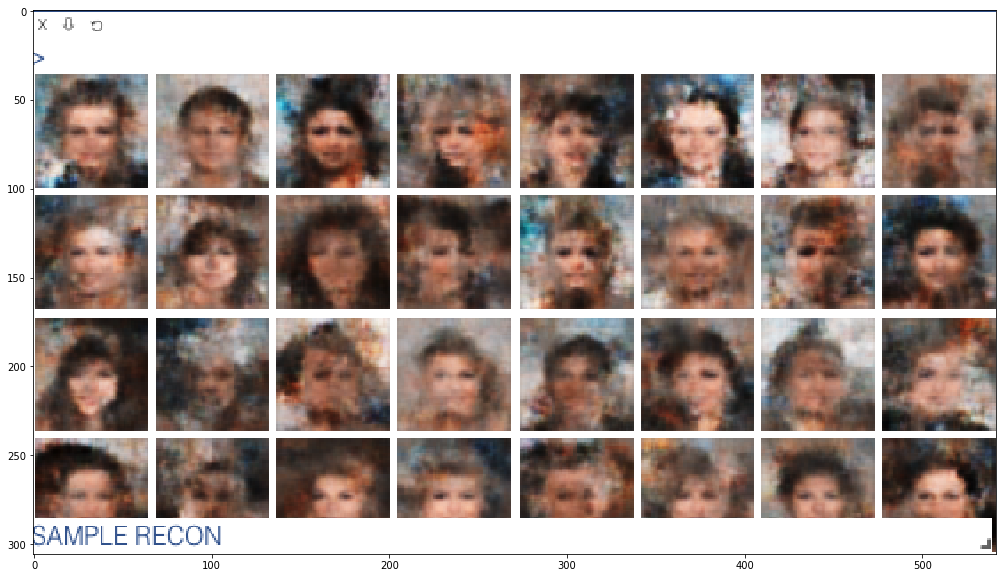

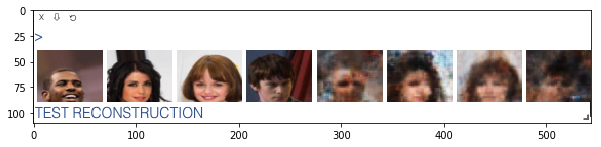

In [52]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Celeb/img_report/Sample.png')
plt.figure(figsize = (20,10))
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('Celeb/img_report/Test_recon.png')
plt.figure(figsize = (10,5))
imgplot = plt.imshow(img)
plt.show()

In [53]:
results = open("Celeb/output_report.txt", "r") 
print(results.read())

Train Epoch: 91 [0/310 (0%)]	Loss: 6338.086914
====> Epoch: 91 Average loss: 6133.9067
====> Test set loss: 6819.0921
save image: results/sample_92.png
Train Epoch: 92 [0/310 (0%)]	Loss: 6481.179199
====> Epoch: 92 Average loss: 6135.4419
====> Test set loss: 6761.7983
save image: results/sample_93.png
Train Epoch: 93 [0/310 (0%)]	Loss: 5910.474121
====> Epoch: 93 Average loss: 6130.5198
====> Test set loss: 6797.3460
save image: results/sample_94.png
Train Epoch: 94 [0/310 (0%)]	Loss: 5929.316406
====> Epoch: 94 Average loss: 6120.5606
====> Test set loss: 6738.5405
save image: results/sample_95.png
Train Epoch: 95 [0/310 (0%)]	Loss: 6437.434570
====> Epoch: 95 Average loss: 6122.3248
====> Test set loss: 6808.9333
save image: results/sample_96.png
Train Epoch: 96 [0/310 (0%)]	Loss: 5578.081543
====> Epoch: 96 Average loss: 6128.0701
====> Test set loss: 6864.4735
save image: results/sample_97.png
Train Epoch: 97 [0/310 (0%)]	Loss: 6296.977051
====> Epoch: 97 Average loss: 6125.2470
=

#### 6. Train and Test Losses

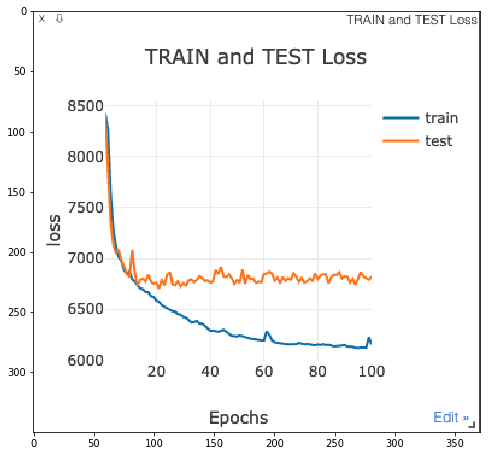

In [51]:
img = mpimg.imread('Celeb/img_report/Train_Test_Losses.png')
plt.figure(figsize = (8,8))
imgplot = plt.imshow(img)
plt.show()

### What I have learnt
Not only that I learnt how VAE works, but more importantly I also learnt how to use Visdom. Visdom is an extremely useful library as it offers real time visualization. 